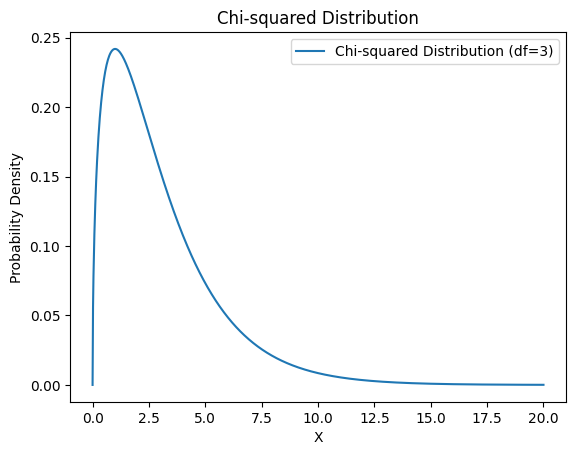

Chi-squared Statistic: 15.041666666666666
P-value: 0.00010516355403363098
Reject the null hypothesis: There is a significant relationship.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency

# Example 1: Plotting Chi-squared Distribution
df = 3  # Degrees of freedom
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df)

plt.plot(x, y, label=f"Chi-squared Distribution (df={df})")
plt.title("Chi-squared Distribution")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Example 2: Chi-squared Test (Contingency Table)
# Create a 2x2 contingency table
observed = np.array([[30, 10], [20, 40]])

# Perform Chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(observed)

print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")